# MovieLens20m Dataset

For this exercise, we will be using the Kaggle MovieLens 20M Dataset. It contains 20000263 ratings for 27278 movies from the Movielens website.  Generated on October 17, 2016, these data were created by 138493 users between January 09, 1995 and March 31, 2015. The ratings file (ratings.csv) contains:
- userId
- movieId
- rating
- timestamp
The following downloads and extracts the data and performs a basic EDA.

In [1]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
from config import DownloadConfig, DeZipConfig, PicklerConfig, DatasetConfig
from etl import KaggleDownloader, DeZipper, Pickler
from dataset import MovieLensRatings

## MovieLens20m ETL

In [2]:

display(HTML('<h3>Download Movielens Dataset from Kaggle</h3>'))
downloader = KaggleDownloader(kaggle_filepath=DownloadConfig().kaggle_filepath,
destination=DownloadConfig().destination,
force=False)
downloader.execute()

display(HTML('<h3>Extract ratings dataset from the Kaggle zipfile</h3>'))
dz = DeZipper(zipfilepath=DeZipConfig().zipfilepath,
            destination=DeZipConfig().destination,
            members=DeZipConfig().members,
            force=False)
dz.execute()     

display(HTML('<h3>Pickle ratings file</h3>'))
pkl = Pickler(infilepath=PicklerConfig().infilepath,
              outfilepath=PicklerConfig().outfilepath,
              infile_format=PicklerConfig().infile_format,
              usecols=PicklerConfig().usecols,
              index_col=PicklerConfig().index_col,
              encoding=PicklerConfig().encoding,
              low_memory=PicklerConfig().low_memory,
              force=False)           
pkl.execute()

INFO:etl:Download skipped as movielens-20m-dataset.zip already exists.


INFO:etl:DeZip skipped as movielens-20m-dataset.zip already exists.


INFO:etl:Pickler skipped as rating.pkl already exists.


## MovieLens EDA

In [3]:
ratings = MovieLensRatings(filepath=DatasetConfig().filepath, fileformat=DatasetConfig.fileformat)

In [4]:
display(HTML('<h3>Dataset Info</h3>'))
ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 3 columns):
 #   Column   Non-Null Count     Dtype  
---  ------   --------------     -----  
 0   userId   20000263 non-null  int64  
 1   movieId  20000263 non-null  int64  
 2   rating   20000263 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 457.8 MB


In [5]:
display(HTML('<h3>Dataset Summary</h3>'))
ratings.summary


,Statistic
Ratings,"20,000,263.0"
Users,"138,493.0"
Items,"26,744.0"
Ave Num Ratings per User,144.41
Ave Num Ratings per Item,747.84


In [6]:
display(HTML('<h3>Dataset Head</h3>'))
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


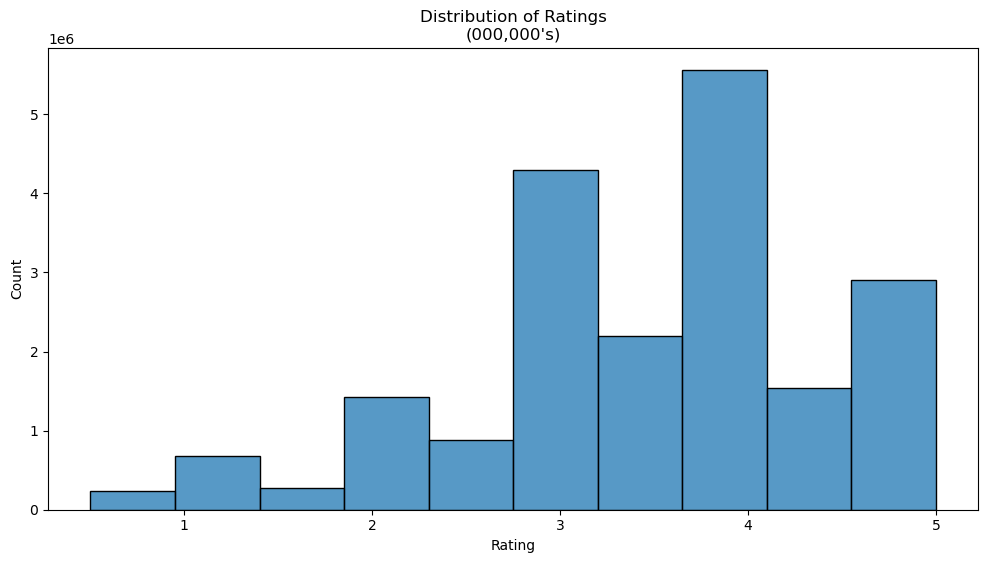

In [7]:
display(HTML('<h3>Ratings Plot</h3>'))
_ = ratings.ratings_plot()

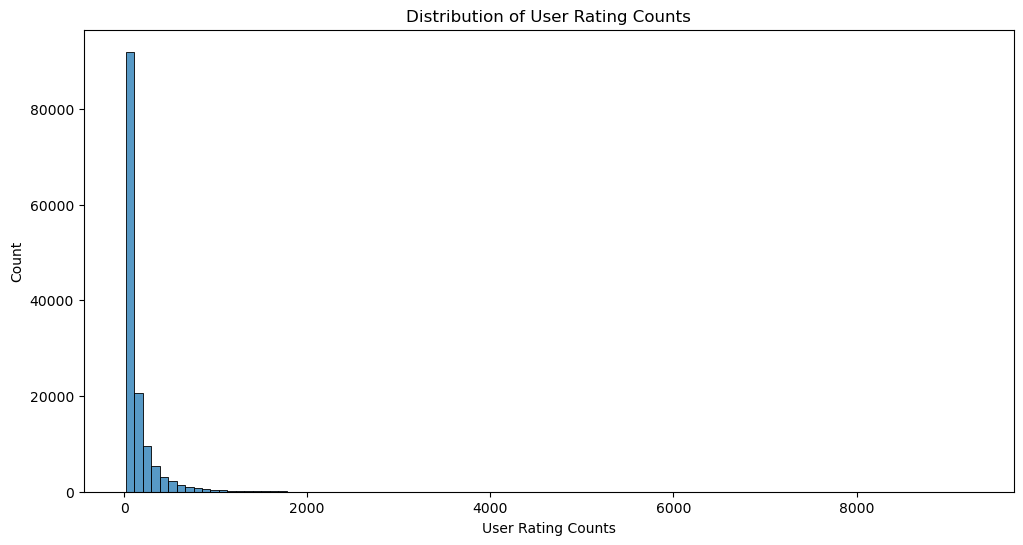

In [8]:
display(HTML('<h3>User Ratings Count Plot</h3>'))
_ = ratings.user_rating_count_plot()

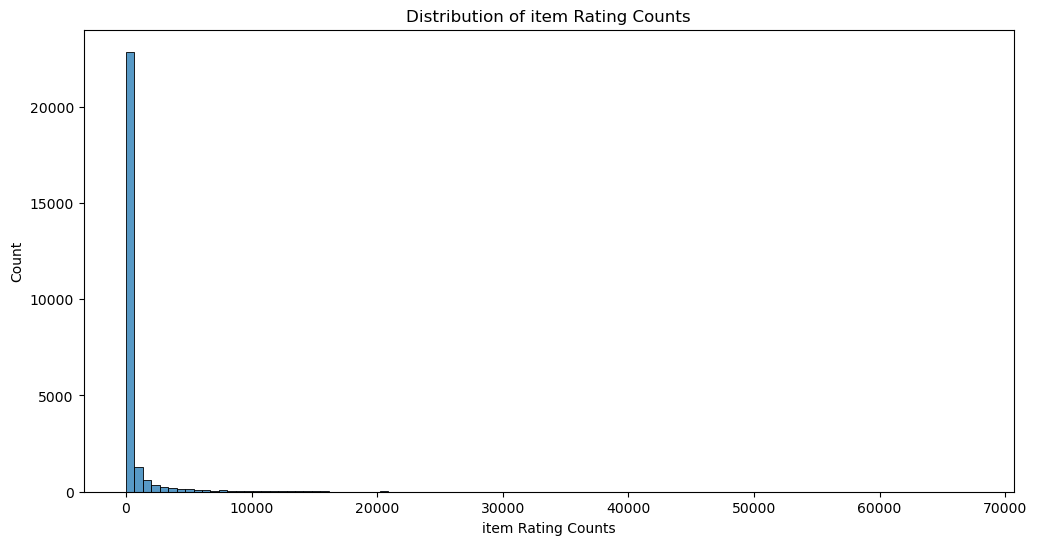

In [9]:
display(HTML('<h3>Item Ratings Count Plot</h3>'))
_ = ratings.item_rating_count_plot()

## Summary
The data contains over 138,000 users and nearly 27,000 items. As expected, the distribution average number of ratings per user and item has a long tail.